In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

KeyboardInterrupt: 

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 10 | ostrovnoy
Processing Record 2 of Set 10 | butaritari
Processing Record 3 of Set 10 | great yarmouth
Processing Record 4 of Set 10 | ilinskiy
Processing Record 5 of Set 10 | zyryanka
Processing Record 6 of Set 10 | cape town
Processing Record 7 of Set 10 | inirida
Processing Record 8 of Set 10 | ushuaia
Processing Record 9 of Set 10 | talnakh
Processing Record 10 of Set 10 | pisco
Processing Record 11 of Set 10 | rikitea
Processing Record 12 of Set 10 | port alfred
Processing Record 13 of Set 10 | zhigalovo
Processing Record 14 of Set 10 | dunedin
Processing Record 15 of Set 10 | lae
Processing Record 16 of Set 10 | moose factory
Processing Record 17 of Set 10 | port elizabeth
Processing Record 18 of Set 10 | la ronge
Processing Record 19 of Set 10 | kobelyaky
Processing Record 20 of Set 10 | uzhur
Processing Record 21 of Set 10 | kavaratti
Processing Record 22 of Set 10 | tete
Processing Record 23 of Set 10 | charters towers
Processing Record 24 of Set 1

Processing Record 34 of Set 13 | troitsko-pechorsk
Processing Record 35 of Set 13 | termiz
Processing Record 36 of Set 13 | moindou
Processing Record 37 of Set 13 | scottsbluff
Processing Record 38 of Set 13 | mochudi
Processing Record 39 of Set 13 | tilichiki
Processing Record 40 of Set 13 | nanortalik
Processing Record 41 of Set 13 | makakilo city
Processing Record 42 of Set 13 | honiara
Processing Record 43 of Set 13 | ginda
Processing Record 44 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 13 | kirillov
Processing Record 46 of Set 13 | kolimvari
City not found. Skipping...
Processing Record 47 of Set 13 | auki
Processing Record 48 of Set 13 | constitucion
Processing Record 49 of Set 13 | saint george
Processing Record 50 of Set 13 | yulara
Processing Record 1 of Set 14 | hithadhoo
Processing Record 2 of Set 14 | karamay
City not found. Skipping...
Processing Record 3 of Set 14 | guaruja
Processing Record 4 of Set 14 | dingle
Processing Record 5 of

Processing Record 18 of Set 17 | sakakah
Processing Record 19 of Set 17 | yar-sale
Processing Record 20 of Set 17 | kidal
Processing Record 21 of Set 17 | nome
Processing Record 22 of Set 17 | yerbogachen
Processing Record 23 of Set 17 | korhogo
Processing Record 24 of Set 17 | okha
Processing Record 25 of Set 17 | kurayoshi
Processing Record 26 of Set 17 | jaru
Processing Record 27 of Set 17 | rawson
Processing Record 28 of Set 17 | lata
Processing Record 29 of Set 17 | castro
Processing Record 30 of Set 17 | lubango
Processing Record 31 of Set 17 | corning
Processing Record 32 of Set 17 | dolbeau
City not found. Skipping...
Processing Record 33 of Set 17 | livingstone
Processing Record 34 of Set 17 | richard toll
City not found. Skipping...
Processing Record 35 of Set 17 | galesong
Processing Record 36 of Set 17 | moa
Processing Record 37 of Set 17 | straumen
Processing Record 38 of Set 17 | benicarlo
Processing Record 39 of Set 17 | muroto
Processing Record 40 of Set 17 | svetlogors

Processing Record 5 of Set 21 | aktau
Processing Record 6 of Set 21 | vanino
Processing Record 7 of Set 21 | port moresby
Processing Record 8 of Set 21 | sisimiut
Processing Record 9 of Set 21 | opuwo
Processing Record 10 of Set 21 | palmas
Processing Record 11 of Set 21 | ilhabela
Processing Record 12 of Set 21 | sitka
Processing Record 13 of Set 21 | sao jose da coroa grande
Processing Record 14 of Set 21 | pimentel
Processing Record 15 of Set 21 | hidalgotitlan
Processing Record 16 of Set 21 | kalianget
Processing Record 17 of Set 21 | bay roberts
Processing Record 18 of Set 21 | kazachinskoye
Processing Record 19 of Set 21 | yakshur-bodya
City not found. Skipping...
Processing Record 20 of Set 21 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 21 | ketchikan
Processing Record 22 of Set 21 | lar
Processing Record 23 of Set 21 | oksfjord
Processing Record 24 of Set 21 | axim
Processing Record 25 of Set 21 | billings
Processing Record 26 of Set 21 | krasnokholm
Processing Reco

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.0531,39.5131,10.78,89,99,5.84,RU,2022-03-06 22:11:26
1,Butaritari,3.0707,172.7902,81.45,78,24,18.70,KI,2022-03-06 22:11:27
2,Great Yarmouth,52.6083,1.7305,42.46,85,23,12.19,GB,2022-03-06 22:11:29
3,Ilinskiy,55.6190,38.1182,29.91,64,75,4.47,RU,2022-03-06 22:11:29
4,Zyryanka,65.7500,150.8500,-28.19,100,100,1.79,RU,2022-03-06 22:11:31
5,Cape Town,-33.9258,18.4232,71.28,83,24,13.80,ZA,2022-03-06 22:07:50
6,Inirida,3.8653,-67.9239,81.18,74,99,2.44,CO,2022-03-06 22:11:34
7,Ushuaia,-54.8000,-68.3000,42.42,96,100,2.98,AR,2022-03-06 22:11:35
8,Talnakh,69.4865,88.3972,-28.82,98,40,3.00,RU,2022-03-06 22:11:36
9,Pisco,-13.7000,-76.2167,73.45,83,75,8.05,PE,2022-03-06 22:11:37


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.0531,39.5131,10.78,89,99,5.84,RU,2022-03-06 22:11:26
1,Butaritari,3.0707,172.7902,81.45,78,24,18.70,KI,2022-03-06 22:11:27
2,Great Yarmouth,52.6083,1.7305,42.46,85,23,12.19,GB,2022-03-06 22:11:29
3,Ilinskiy,55.6190,38.1182,29.91,64,75,4.47,RU,2022-03-06 22:11:29
4,Zyryanka,65.7500,150.8500,-28.19,100,100,1.79,RU,2022-03-06 22:11:31
5,Cape Town,-33.9258,18.4232,71.28,83,24,13.80,ZA,2022-03-06 22:07:50
6,Inirida,3.8653,-67.9239,81.18,74,99,2.44,CO,2022-03-06 22:11:34
7,Ushuaia,-54.8000,-68.3000,42.42,96,100,2.98,AR,2022-03-06 22:11:35
8,Talnakh,69.4865,88.3972,-28.82,98,40,3.00,RU,2022-03-06 22:11:36
9,Pisco,-13.7000,-76.2167,73.45,83,75,8.05,PE,2022-03-06 22:11:37


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ostrovnoy,RU,2022-03-06 22:11:26,68.0531,39.5131,10.78,89,99,5.84
1,Butaritari,KI,2022-03-06 22:11:27,3.0707,172.7902,81.45,78,24,18.70
2,Great Yarmouth,GB,2022-03-06 22:11:29,52.6083,1.7305,42.46,85,23,12.19
3,Ilinskiy,RU,2022-03-06 22:11:29,55.6190,38.1182,29.91,64,75,4.47
4,Zyryanka,RU,2022-03-06 22:11:31,65.7500,150.8500,-28.19,100,100,1.79
5,Cape Town,ZA,2022-03-06 22:07:50,-33.9258,18.4232,71.28,83,24,13.80
6,Inirida,CO,2022-03-06 22:11:34,3.8653,-67.9239,81.18,74,99,2.44
7,Ushuaia,AR,2022-03-06 22:11:35,-54.8000,-68.3000,42.42,96,100,2.98
8,Talnakh,RU,2022-03-06 22:11:36,69.4865,88.3972,-28.82,98,40,3.00
9,Pisco,PE,2022-03-06 22:11:37,-13.7000,-76.2167,73.45,83,75,8.05


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

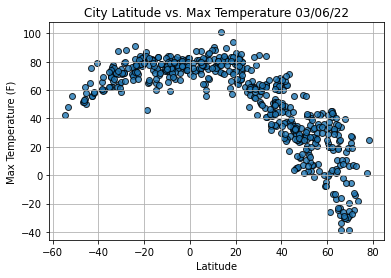

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

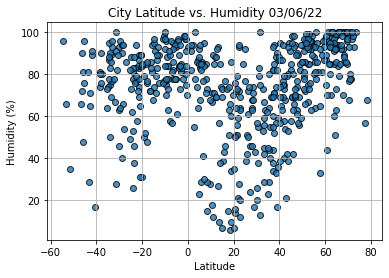

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

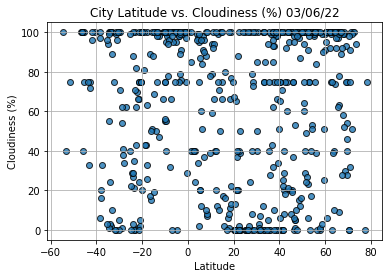

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()